In [95]:
import numpy as np
from matplotlib import pyplot as plt



In [96]:
D = np.random.random((10,2))

In [97]:
D

array([[0.70565007, 0.57158707],
       [0.05284612, 0.89150826],
       [0.55576153, 0.82309079],
       [0.4003751 , 0.22729454],
       [0.82977445, 0.00314861],
       [0.73011737, 0.14728212],
       [0.42752044, 0.41751695],
       [0.92183939, 0.43542424],
       [0.84306864, 0.92382423],
       [0.63818082, 0.04466032]])

In [98]:
D1 = np.array([[0.64754855, 0.59507059],
       [0.3120167 , 0.03192053],
       [0.37969568, 0.86204827],
       [0.02818424, 0.98058601],
       [0.396828  , 0.31667695],
       [0.61613117, 0.34472543],
       [0.74338109, 0.51823655],
       [0.73737023, 0.62347628],
       [0.46752571, 0.39628274],
       [0.63097959, 0.38178618]])

In [99]:
D1

array([[0.64754855, 0.59507059],
       [0.3120167 , 0.03192053],
       [0.37969568, 0.86204827],
       [0.02818424, 0.98058601],
       [0.396828  , 0.31667695],
       [0.61613117, 0.34472543],
       [0.74338109, 0.51823655],
       [0.73737023, 0.62347628],
       [0.46752571, 0.39628274],
       [0.63097959, 0.38178618]])

In [100]:
X1 = D[:,0]
X2 = D[:,1]
X1,X2
Y = np.array([(2*x1+x2)>1.5 for (x1,x2) in zip(X1,X2)])
Y , X1 , X2

(array([ True, False,  True, False,  True,  True, False,  True,  True,
        False]),
 array([0.70565007, 0.05284612, 0.55576153, 0.4003751 , 0.82977445,
        0.73011737, 0.42752044, 0.92183939, 0.84306864, 0.63818082]),
 array([0.57158707, 0.89150826, 0.82309079, 0.22729454, 0.00314861,
        0.14728212, 0.41751695, 0.43542424, 0.92382423, 0.04466032]))

In [27]:
print(X1[Y],X2[Y])
Y_0 = ((Y-1)*(-1)).astype(bool)
print(Y,Y_0)
print(X1[Y_0],X2[Y_0])


[0.93749279 0.82513063 0.64898222 0.88499995] [0.58900669 0.45892086 0.60858472 0.32652768]
[False False False  True  True  True  True False False False] [ True  True  True False False False False  True  True  True]
[0.56504776 0.26100104 0.24444802 0.11033772 0.55222149 0.40296979] [0.29552953 0.05634327 0.70788995 0.07402598 0.10048627 0.18125545]


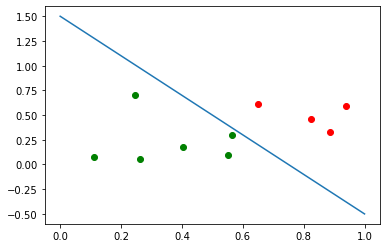

In [33]:
plt.scatter(X1[Y],X2[Y],c='r')
plt.scatter(X1[Y_0],X2[Y_0],c='g')

x = np.linspace(0,1,100)
y = 1.5-2*x
plt.plot(x,y)
plt.show()

In [119]:
w = np.zeros(D.shape[1])
y = Y.astype(int)
y = y*2-1
D,w,y

(array([[0.70565007, 0.57158707],
        [0.05284612, 0.89150826],
        [0.55576153, 0.82309079],
        [0.4003751 , 0.22729454],
        [0.82977445, 0.00314861],
        [0.73011737, 0.14728212],
        [0.42752044, 0.41751695],
        [0.92183939, 0.43542424],
        [0.84306864, 0.92382423],
        [0.63818082, 0.04466032]]),
 array([0., 0.]),
 array([ 1, -1,  1, -1,  1,  1, -1,  1,  1, -1]))

## 准备模型

In [120]:

def ganzhiqi(x):
    y = np.dot(w,x)
    # print(y)
    if y>0:
        return 1
    else:
        return -1
    


In [121]:
ganzhiqi(np.array([1,2]))
D

array([[0.70565007, 0.57158707],
       [0.05284612, 0.89150826],
       [0.55576153, 0.82309079],
       [0.4003751 , 0.22729454],
       [0.82977445, 0.00314861],
       [0.73011737, 0.14728212],
       [0.42752044, 0.41751695],
       [0.92183939, 0.43542424],
       [0.84306864, 0.92382423],
       [0.63818082, 0.04466032]])

In [128]:
T = 250
t = 0 
k = 0
N = len(D)
# for n in range(N):
while(t<T):
    for i in range(N):
        xi = D[i]
        yi = y[i]
        print(i,xi,yi)
        if yi*ganzhiqi(xi)<0:
            w = w + yi * xi
            k = k + 1
            print('更新:',k,w)
        t = t + 1

print("last:",w)
    # if 
    # if w*(y*x)<=0:
    #     w = w + y * x
    # t = t +1
    # print(t,w)
    # if t==T:
    #     break
    




0 [0.70565007 0.57158707] 1
1 [0.05284612 0.89150826] -1
2 [0.55576153 0.82309079] 1
3 [0.4003751  0.22729454] -1
更新: 1 [-0.10286689 -0.24496503]
4 [0.82977445 0.00314861] 1
更新: 2 [ 0.72690757 -0.24181642]
5 [0.73011737 0.14728212] 1
6 [0.42752044 0.41751695] -1
更新: 3 [ 0.29938713 -0.65933337]
7 [0.92183939 0.43542424] 1
更新: 4 [ 1.22122652 -0.22390913]
8 [0.84306864 0.92382423] 1
9 [0.63818082 0.04466032] -1
更新: 5 [ 0.5830457  -0.26856945]
0 [0.70565007 0.57158707] 1
1 [0.05284612 0.89150826] -1
2 [0.55576153 0.82309079] 1
3 [0.4003751  0.22729454] -1
更新: 6 [ 0.1826706  -0.49586399]
4 [0.82977445 0.00314861] 1
5 [0.73011737 0.14728212] 1
6 [0.42752044 0.41751695] -1
7 [0.92183939 0.43542424] 1
更新: 7 [ 1.10450999 -0.06043975]
8 [0.84306864 0.92382423] 1
9 [0.63818082 0.04466032] -1
更新: 8 [ 0.46632917 -0.10510007]
0 [0.70565007 0.57158707] 1
1 [0.05284612 0.89150826] -1
2 [0.55576153 0.82309079] 1
3 [0.4003751  0.22729454] -1
更新: 9 [ 0.06595407 -0.33239461]
4 [0.82977445 0.00314861] 1
5 